# Objective
To perform a complete data analysis on hotel room income and booking.com reservation data to derive business insights, including profitability per room, occupancy trends, and improvement areas.

## Step 1: Import Libraries

In [9]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Configure display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Step 2: Load and Inspect Data

In [10]:
# Load CSV files
room_income = pd.read_csv('../data/room_income.csv')
bcom_data = pd.read_csv('../data/bcom_data.csv')

# Quick preview
print("Room Income Data:")
display(room_income.head())

print("\nBooking.com Data:")
display(bcom_data.head())

# Summary info
room_income.info()
bcom_data.info()


Room Income Data:


,Property,Room,Room Type,Total Res,Total Nights,Accom,Discount,Other,Total,Avg Accom,Avg Discount,Avg Other,Avg Daily Tariff,Occupancy (%)
0,Highfield Hotel,1,Triple,140,267,47631.80,0.0,789.62,48421.42,340.23,0.0,5.64,178.40,36.48
1,Highfield Hotel,3,Double,149,337,39679.60,0.0,436.73,40116.33,266.31,0.0,2.93,117.74,46.04
2,Highfield Hotel,4,Double En,156,378,52065.08,0.0,816.00,52881.08,333.75,0.0,5.23,137.74,51.64
3,Highfield Hotel,5,Double En,185,361,55093.32,0.0,656.36,55749.68,297.80,0.0,3.55,152.61,49.32
4,Highfield Hotel,6,Double,159,378,44191.82,0.0,301.31,44493.13,277.94,0.0,1.90,116.91,51.64



Booking.com Data:


,Property name,Location,Booker name,Genius booker,Arrival,Departure,Booked on,Status,Total payment,Commission,Currency,Reservation number
0,Highfield Private Hotel,"166 Victoria Street\nSydney, Australia",Jessica Cook,No,1 July 2023,3 July 2023,26 June 2023,OK,264.0,37.63,AUD,2239342525
1,Highfield Private Hotel,"166 Victoria Street\nSydney, Australia",Grace Lucero,No,1 July 2023,2 July 2023,22 June 2023,OK,390.0,46.80,AUD,2306765747
2,Highfield Private Hotel,"166 Victoria Street\nSydney, Australia",Jeffrey Agobida,No,1 July 2023,2 July 2023,1 July 2023,OK,160.0,19.20,AUD,3801683948
3,Highfield Private Hotel,"166 Victoria Street\nSydney, Australia",Jordyn Campbell,No,2 July 2023,3 July 2023,2 July 2023,OK,119.0,20.23,AUD,3055592154
4,Highfield Private Hotel,"166 Victoria Street\nSydney, Australia",Zahra Mohammadi,No,3 July 2023,7 July 2023,7 May 2023,Cancelled,1176.0,199.92,AUD,3341235565


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Property          33 non-null     object 
 1   Room              32 non-null     object 
 2   Room Type         32 non-null     object 
 3   Total Res         33 non-null     int64  
 4   Total Nights      33 non-null     int64  
 5   Accom             33 non-null     float64
 6   Discount          33 non-null     float64
 7   Other             33 non-null     float64
 8   Total             33 non-null     float64
 9   Avg Accom         33 non-null     float64
 10  Avg Discount      33 non-null     float64
 11  Avg Other         33 non-null     float64
 12  Avg Daily Tariff  33 non-null     float64
 13  Occupancy (%)     33 non-null     float64
dtypes: float64(9), int64(2), object(3)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data colu

## Step 3: Data Cleaning

### Room Income Dataset

In [11]:
# Drop any rows with missing values
room_income.dropna(inplace=True)

# Strip column names
room_income.columns = room_income.columns.str.strip()

# Fix inconsistent room naming
room_income['Room Type'] = room_income['Room Type'].str.strip().str.title()

# Check for duplicates
room_income.drop_duplicates(inplace=True)


### Booking.com Dataset

In [12]:
# Strip whitespace from column names
bcom_data.columns = bcom_data.columns.str.strip()

# Convert dates
bcom_data['Arrival'] = pd.to_datetime(bcom_data['Arrival'], errors='coerce')
bcom_data['Departure'] = pd.to_datetime(bcom_data['Departure'], errors='coerce')
bcom_data['Booked on'] = pd.to_datetime(bcom_data['Booked on'], errors='coerce')

# Filter out Cancelled and No show
bcom_data = bcom_data[bcom_data['Status'] == 'OK']

# Drop unnecessary text column
bcom_data['Property name'] = bcom_data['Property name'].str.strip()

# Check for duplicates
bcom_data.drop_duplicates(inplace=True)


## Step 4: Feature Engineering

In [13]:
# Calculate length of stay
bcom_data['Nights'] = (bcom_data['Departure'] - bcom_data['Arrival']).dt.days

# Calculate daily rate per booking
bcom_data['Daily Rate'] = bcom_data['Total payment'] / bcom_data['Nights']

# Aggregate commission per room
bcom_revenue_summary = bcom_data.groupby('Arrival').agg({
    'Total payment': 'sum',
    'Commission': 'sum',
    'Reservation number': 'count'
}).reset_index().rename(columns={'Reservation number': 'Total Bookings'})


## Step 5: Visual Analysis

### 5.1 Occupancy Trends by Month

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_30740/3632532859.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/hemang/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


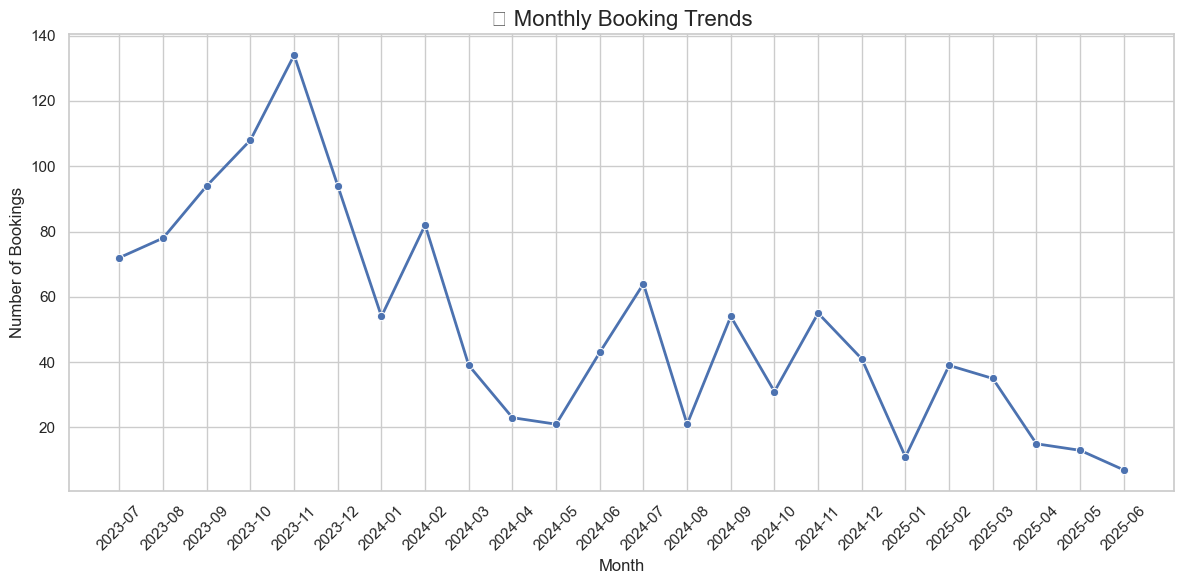

In [14]:
# Extract month-year from arrival date
bcom_data['Month'] = bcom_data['Arrival'].dt.to_period('M').astype(str)

# Count bookings per month
monthly_bookings = bcom_data.groupby('Month').size().reset_index(name='Bookings')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings, x='Month', y='Bookings', marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.title("📊 Monthly Booking Trends", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(True)
plt.tight_layout()
plt.show()


### 5.2 🏨 Revenue Heatmap Per Room

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_30740/2653799755.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = room_revenue.pivot("Room Type", "Room", "Total")
/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_30740/2653799755.py:13: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  plt.tight_layout()
/Users/hemang/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


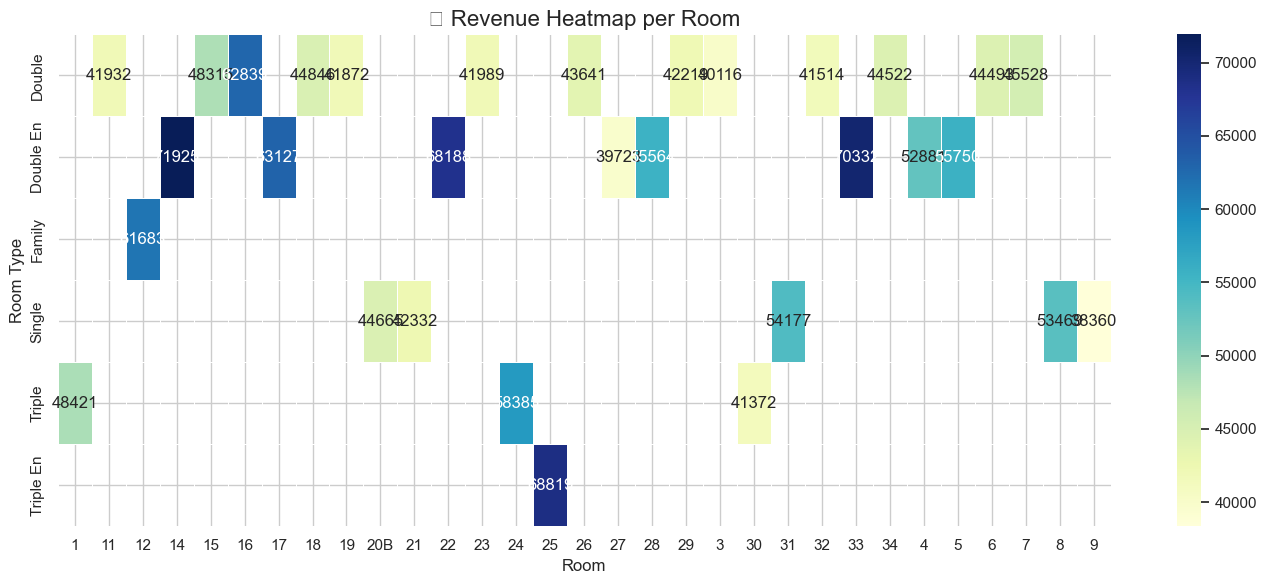

In [15]:
# Group revenue by Room and Room Type
room_revenue = room_income.groupby(['Room', 'Room Type'])['Total'].sum().reset_index()

# Pivot to create a matrix
heatmap_data = room_revenue.pivot("Room Type", "Room", "Total")

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title("💵 Revenue Heatmap per Room", fontsize=16)
plt.xlabel("Room")
plt.ylabel("Room Type")
plt.tight_layout()
plt.show()


### 5.3 📈 Profit Margin Per Room
Assume profit = Accom + Other - Discount (Discount is 0 in your dataset, but this is structured for extension).

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_30740/1975698443.py:14: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from current font.
  plt.tight_layout()
/Users/hemang/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


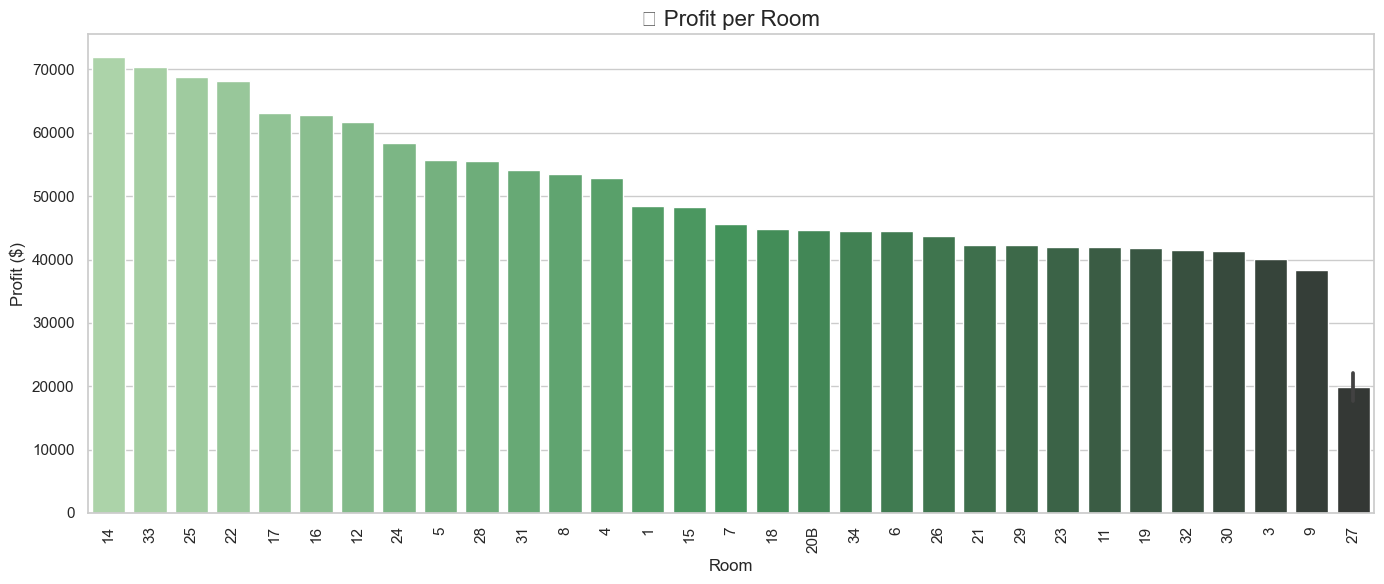

In [16]:
# Calculate profit per room
room_income['Profit'] = room_income['Accom'] + room_income['Other'] - room_income['Discount']

# Sort by profit
profit_sorted = room_income.sort_values('Profit', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=profit_sorted, x='Room', y='Profit', palette='Greens_d')
plt.title("🏅 Profit per Room", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Profit ($)")
plt.xlabel("Room")
plt.tight_layout()
plt.show()


### 5.4 📊 Booking Frequency per Guest 

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_30740/2971200616.py:11: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from current font.
  plt.tight_layout()
/Users/hemang/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


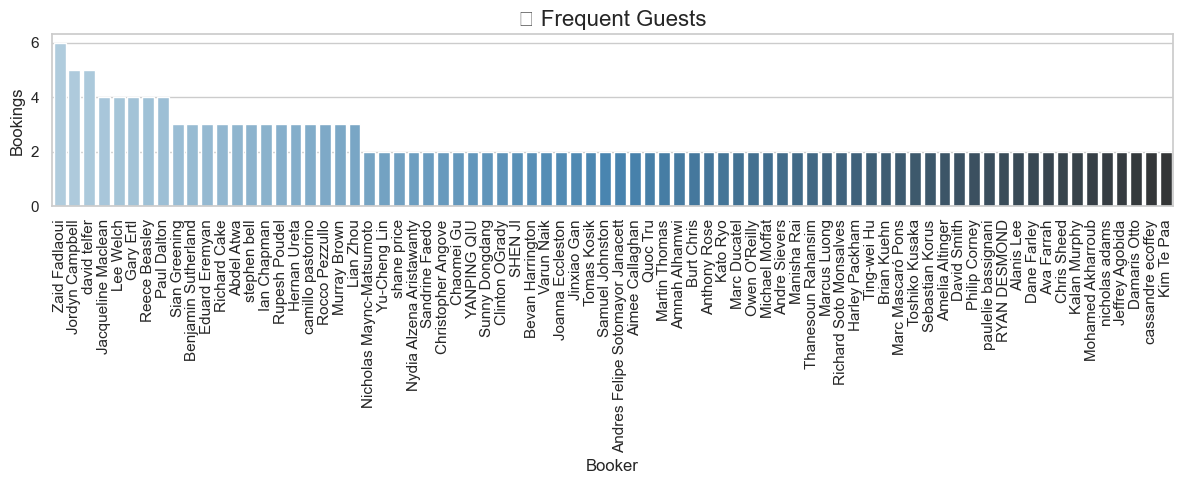

In [17]:
# Count bookings per guest
top_bookers = bcom_data['Booker name'].value_counts().reset_index()
top_bookers.columns = ['Booker', 'Bookings']
top_bookers = top_bookers[top_bookers['Bookings'] > 1]

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=top_bookers, x='Booker', y='Bookings', palette='Blues_d')
plt.title("📘 Frequent Guests", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 5.5 ❌ Cancellation & No Show Trends

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_30740/3709466709.py:14: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  plt.tight_layout()
/Users/hemang/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


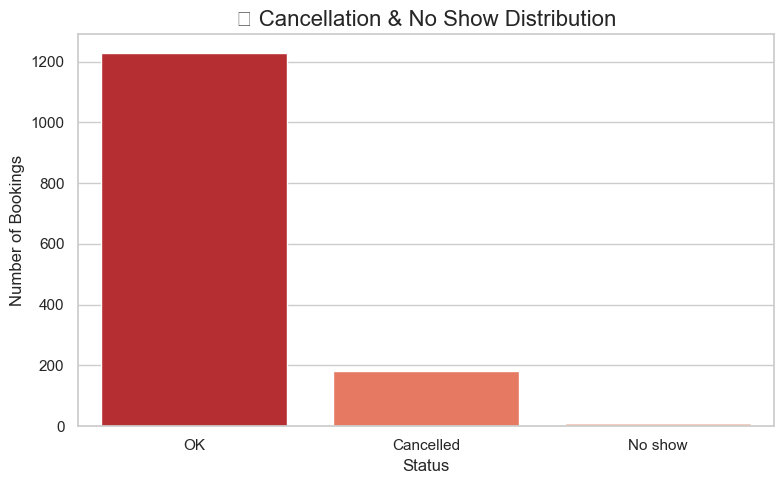

In [19]:
# Load raw data again for cancellation analysis
bcom_all = pd.read_csv('../data/bcom_data.csv')
bcom_all['Status'] = bcom_all['Status'].str.strip()

# Count cancellations and no-shows
status_counts = bcom_all['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=status_counts, x='Status', y='Count', palette='Reds_r')
plt.title("🚫 Cancellation & No Show Distribution", fontsize=16)
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()
